In [527]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from matplotlib.pylab import rcParams
    rcParams['figure.figsize'] = 50, 50
    %matplotlib inline
    import matplotlib.cm as cm
    from sklearn.decomposition import PCA, KernelPCA
    from sklearn.manifold import TSNE, MDS
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split
    from sklearn.cluster import KMeans
import time
from IPython import display

In [528]:
def check_range(x):
    if x < 0:
        x = 0
    elif x > 99:
        x = 99
    return x

In [529]:
def twoD_Gaussian(x, y, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g

In [530]:
x = np.linspace(0, 200, 201)
y = np.linspace(0, 200, 201)
x, y = np.meshgrid(x, y)

#create data
data = twoD_Gaussian(x, y, 30, 100, 100, 20, 40, 0, 10)

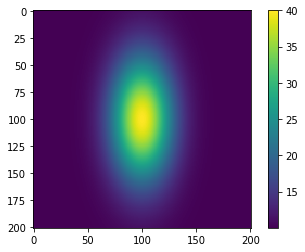

In [531]:
plt.figure()
plt.imshow(data)
plt.colorbar()

In [532]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [533]:
y = train['target'].values.astype(np.int8)

In [534]:
features = list(set(train.columns) - (set(['id','target']))) 
features_bin = [i for i in features if set(i)&set('bin')==set('bin')]
features_cat = [i for i in features if set(i)&set('cat')==set('cat')]
features_con = list(set(features) - (set(features_bin)|set(features_cat)))

In [535]:
train=train[features_con]

In [536]:
X = train.values
target_names = np.unique(y)

In [537]:
mms = MinMaxScaler(copy=True, feature_range=(-1, 1))

In [538]:
mms.fit(X)

MinMaxScaler(copy=True, feature_range=(-1, 1))

In [539]:
X = mms.transform(X)

In [546]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=512, stratify=y, shuffle=True)

In [547]:
n_comp = 25
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X_train)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])



Running PCA ...
Explained variance: 0.9998
Individual variance contributions:
0.125517399489
0.0938273174051
0.0936232300959
0.0930779884331
0.0884468373229
0.0607054157287
0.0475557579984
0.0458762062888
0.0450004850419
0.0393302722865
0.0340536765927
0.0328663225596
0.0292095359177
0.0291667745731
0.022680400276
0.0195683113119
0.0163435165134
0.0156417357156
0.0138430942849
0.0132867996012
0.013102511135
0.0124143347636
0.0108945860703
0.0028272752615
0.000917646662472


In [548]:
#n_clusters=665,
kmeansclustering = KMeans(n_jobs=12,n_clusters=665, n_init=25, init='k-means++', precompute_distances=True, random_state=42, copy_x=True, algorithm='full' )

In [549]:
X_trans = np.vstack((X_pca[:, 1],X_pca[:, 2])).T
y_pred = kmeansclustering.fit_predict(X_trans)

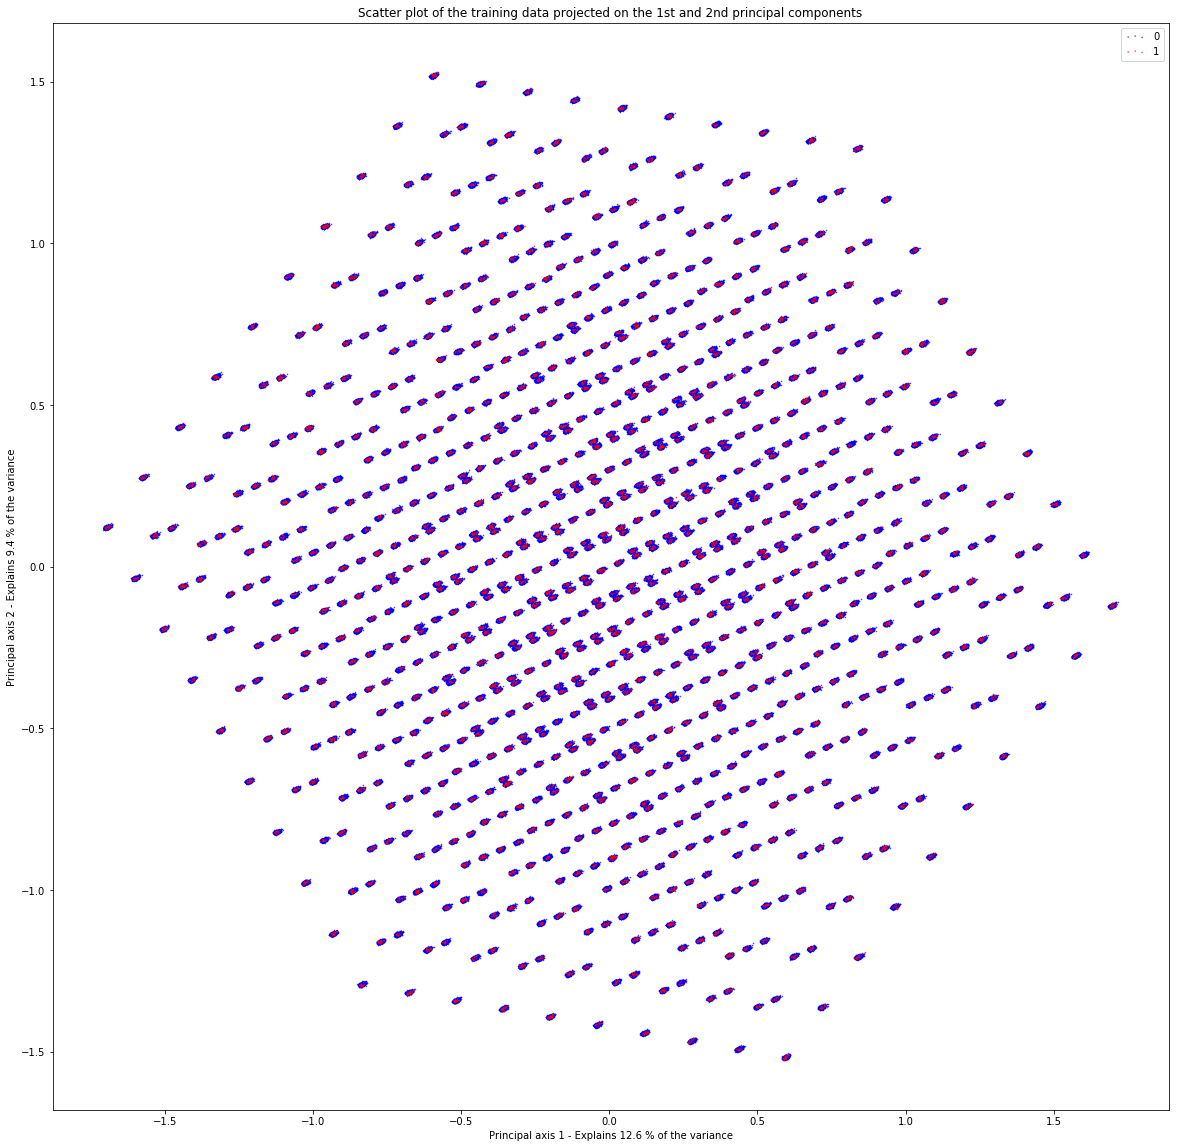

In [550]:
colors = ['blue', 'red']
plt.figure(1, figsize=(20, 20))
#plt.scatter(X_trans[:, 0],X_trans[:, 1], c=y_pred,alpha=0.1)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y_train == i, 1], X_pca[y_train == i, 2], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

#plt.savefig('pca-porto-01.png', dpi=150)
plt.show()


In [ ]:
for clstr in range(5,125):
    #clstr=18
    display.clear_output(wait=True)
    plt.figure()
    plt.scatter(X_trans[(y_pred==clstr)&(y_train == 0),0], X_trans[(y_pred==clstr)&(y_train == 0),1])
    plt.scatter(X_trans[(y_pred==clstr)&(y_train == 1),0], X_trans[(y_pred==clstr)&(y_train == 1),1])
    plt.show()
    
    display.display(plt.gcf())
    time.sleep(1)

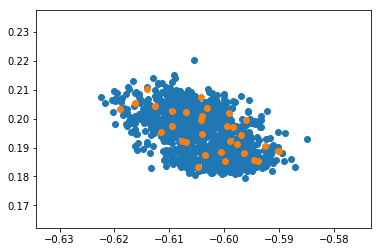

In [417]:
plt.scatter(X_trans[(y_pred==1)&(y_train == 0),0], X_trans[(y_pred==1)&(y_train == 0),1])
plt.scatter(X_trans[(y_pred==1)&(y_train == 1),0], X_trans[(y_pred==1)&(y_train == 1),1])
plt.show()

In [418]:
from sklearn.preprocessing import scale,minmax_scale


In [477]:
from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    z = minmax_scale( z, axis=0, copy=True )
    return xx, yy, np.reshape(z, xx.shape)

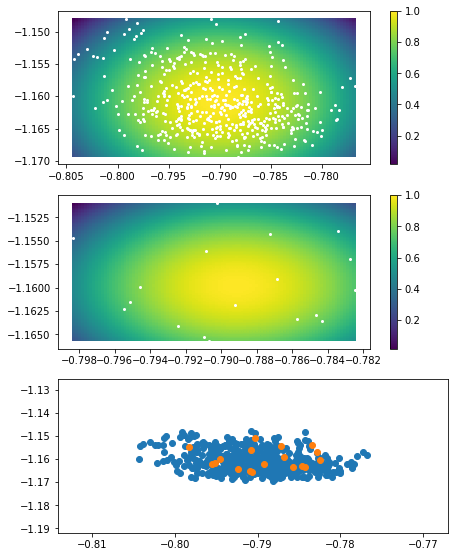

In [478]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(7, 9.6))

clstr=124

x = X_trans[(y_pred==clstr)&(y_train == 0),0]
y = X_trans[(y_pred==clstr)&(y_train == 0),1]


xx, yy, zz = kde2D(x, y, 1.0)

mpl0= ax0.pcolormesh(xx, yy, zz)
fig.colorbar(mpl0, ax=ax0)

ax0.scatter(x, y, s=4, facecolor='white')

x = X_trans[(y_pred==clstr)&(y_train == 1),0]
y = X_trans[(y_pred==clstr)&(y_train == 1),1]


xx, yy, zz = kde2D(x, y, 1.0)

mpl = ax1.pcolormesh(xx, yy, zz)
fig.colorbar(mpl, ax=ax1)
ax1.scatter(x, y, s=4, facecolor='white')


ax2.scatter(X_trans[(y_pred==clstr)&(y_train == 0),0], X_trans[(y_pred==clstr)&(y_train == 0),1])
ax2.scatter(X_trans[(y_pred==clstr)&(y_train == 1),0], X_trans[(y_pred==clstr)&(y_train == 1),1])

plt.show()

### Test

In [421]:
# transform test set into learnt parameters
X_pca_test = pca.transform(X_test)
X_trans_test = np.vstack((X_pca_test[:, 1],X_pca_test[:, 2])).T
instances_clustes = kmeansclustering.predict(X_trans_test)

In [492]:
# pick a random intance
i = np.random.randint(59522)

In [493]:
y_test[i]

0

In [520]:
len(np.where(y_test==1)[0])

2169

In [521]:
y_predict = []
for  i in np.where(y_test==1)[0][:2000]:
    cluster = instances_clustes[i]
    x_c0 = X_trans[(y_pred==cluster)&(y_train == 0),0]
    y_c0 = X_trans[(y_pred==cluster)&(y_train == 0),1]
    xx_c0, yy_c0, zz_c0 = kde2D(x_c0, y_c0, 1.0)
        
    x_c1 = X_trans[(y_pred==cluster)&(y_train == 1),0]
    y_c1 = X_trans[(y_pred==cluster)&(y_train == 1),1]
    xx_c1, yy_c1, zz_c1 = kde2D(x_c1, y_c1, 1.0)
    
    
    x_hat_c0 = np.round(((X_trans_test[i,0]-x_c0.min())*99)/(x_c0.max()-x_c0.min())).astype(int)
    y_hat_c0 = np.round(((X_trans_test[i,1]-y_c0.min())*99)/(y_c0.max()-y_c0.min())).astype(int)
    
    x_hat_c0 =check_range(x_hat_c0)
    y_hat_c0 =check_range(y_hat_c0)
    
    x_hat_c1 = np.round(((X_trans_test[i,0]-x_c1.min())*99)/(x_c1.max()-x_c1.min())).astype(int)
    y_hat_c1 = np.round(((X_trans_test[i,1]-y_c0.min())*99)/(y_c1.max()-y_c1.min())).astype(int)
    
    x_hat_c1 =check_range(x_hat_c1)
    y_hat_c1 =check_range(y_hat_c1)
    
    if zz_c1[x_hat_c1][y_hat_c1]*1.5 > zz_c0[x_hat_c0][y_hat_c0]:
        y_predict.append(1)
    else:
        y_predict.append(0)
    

In [523]:
np.sum(y_predict)/len(y_predict)

0.85350000000000004

In [525]:
y_predict = []
for  i in np.where(y_test==0)[0][:200]:
    cluster = instances_clustes[i]
    x_c0 = X_trans[(y_pred==cluster)&(y_train == 0),0]
    y_c0 = X_trans[(y_pred==cluster)&(y_train == 0),1]
    xx_c0, yy_c0, zz_c0 = kde2D(x_c0, y_c0, 1.0)
        
    x_c1 = X_trans[(y_pred==cluster)&(y_train == 1),0]
    y_c1 = X_trans[(y_pred==cluster)&(y_train == 1),1]
    xx_c1, yy_c1, zz_c1 = kde2D(x_c1, y_c1, 1.0)
    
    
    x_hat_c0 = np.round(((X_trans_test[i,0]-x_c0.min())*99)/(x_c0.max()-x_c0.min())).astype(int)
    y_hat_c0 = np.round(((X_trans_test[i,1]-y_c0.min())*99)/(y_c0.max()-y_c0.min())).astype(int)
    
    x_hat_c0 =check_range(x_hat_c0)
    y_hat_c0 =check_range(y_hat_c0)
    
    x_hat_c1 = np.round(((X_trans_test[i,0]-x_c1.min())*99)/(x_c1.max()-x_c1.min())).astype(int)
    y_hat_c1 = np.round(((X_trans_test[i,1]-y_c0.min())*99)/(y_c1.max()-y_c1.min())).astype(int)
    
    x_hat_c1 =check_range(x_hat_c1)
    y_hat_c1 =check_range(y_hat_c1)
    
    if zz_c1[x_hat_c1][y_hat_c1]*1.5 > zz_c0[x_hat_c0][y_hat_c0]:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [526]:
np.sum(y_predict)/len(y_predict)

0.83499999999999996

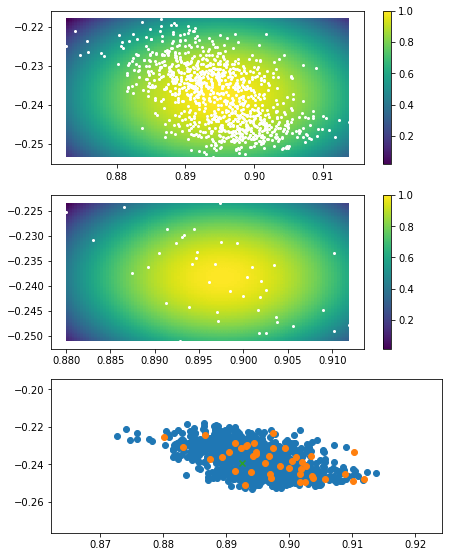

In [496]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(7, 9.6))


x = X_trans[(y_pred==cluster)&(y_train == 0),0]
y = X_trans[(y_pred==cluster)&(y_train == 0),1]


xx, yy, zz = kde2D(x, y, 1.0)

mpl0= ax0.pcolormesh(xx, yy, zz)
fig.colorbar(mpl0, ax=ax0)

ax0.scatter(x, y, s=4, facecolor='white')

x = X_trans[(y_pred==cluster)&(y_train == 1),0]
y = X_trans[(y_pred==cluster)&(y_train == 1),1]


xx, yy, zz = kde2D(x, y, 1.0)

mpl = ax1.pcolormesh(xx, yy, zz)
fig.colorbar(mpl, ax=ax1)
ax1.scatter(x, y, s=4, facecolor='white')


ax2.scatter(X_trans[(y_pred==cluster)&(y_train == 0),0], X_trans[(y_pred==cluster)&(y_train == 0),1])
ax2.scatter(X_trans[(y_pred==cluster)&(y_train == 1),0], X_trans[(y_pred==cluster)&(y_train == 1),1])
ax2.scatter(X_trans_test[i,0], X_trans_test[i,1],marker='x')

plt.show()

In [497]:
x_c0 = X_trans[(y_pred==cluster)&(y_train == 0),0]
y_c0 = X_trans[(y_pred==cluster)&(y_train == 0),1]
xx_c0, yy_c0, zz_c0 = kde2D(x_c0, y_c0, 1.0)

x_c1 = X_trans[(y_pred==cluster)&(y_train == 1),0]
y_c1 = X_trans[(y_pred==cluster)&(y_train == 1),1]
xx_c1, yy_c1, zz_c1 = kde2D(x_c1, y_c1, 1.0)

In [498]:
x_hat_c0 = np.round(((X_trans_test[i,0]-x_c0.min())*99)/(x_c0.max()-x_c0.min())).astype(int)
y_hat_c0 = np.round(((X_trans_test[i,1]-y_c0.min())*99)/(y_c0.max()-y_c0.min())).astype(int)

In [499]:
x_hat_c0 =check_range(x_hat_c0)
y_hat_c0 =check_range(y_hat_c0)

In [500]:
x_hat_c0,y_hat_c0

(48, 40)

In [501]:
x_hat_c1 = np.round(((X_trans_test[i,0]-x_c1.min())*99)/(x_c1.max()-x_c1.min())).astype(int)
y_hat_c1 = np.round(((X_trans_test[i,1]-y_c0.min())*99)/(y_c1.max()-y_c1.min())).astype(int)

In [502]:
x_hat_c1 =check_range(x_hat_c1)
y_hat_c1 =check_range(y_hat_c1)

In [503]:
x_hat_c1,y_hat_c1

(39, 51)

In [504]:
zz_c0[x_hat_c0][y_hat_c0]

0.99250949777524511

In [505]:
zz_c1[x_hat_c1][y_hat_c1]

0.94979616256841837